In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import circlify as circlify
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

import kaleido

# Dimensions:
* Country
* Country (Location)
* Sector
* Sector (Spending)
* Total Spending
* Time

In [15]:
# Non-Major European Countries
non_major_european_countries = [
    "Latvia", "Lithuania", "Estonia",
    "Albania", "Bosnia and Herzegovina", "Croatia", "Montenegro", "North Macedonia", "Serbia",
    "Czech Republic", "Hungary", "Slovakia", "Slovenia",
    "Denmark", "Finland", "Norway", "Sweden",
    "Bulgaria", "Romania"
]

# Non-Major South American Countries
non_major_south_american_countries = [
    "Bolivia", "Ecuador", "Peru",
    "Guyana", "Suriname",
    "Paraguay", "Uruguay"
]

# African Countries
african_countries = [
    "Algeria", "Egypt", "Libya", "Morocco", "Tunisia",
    "Ethiopia", "Kenya", "Tanzania", "Uganda",
    "Ghana", "Nigeria", "Senegal",
    "Angola", "Mozambique", "Zambia", "Zimbabwe"
]

# South Asian Countries
south_asian_countries = [
    "Bangladesh", "Nepal", "Sri Lanka",
    "Bhutan", "Maldives"
]

# Country Abbreviations
abbreviations = {
    'Australia': 'AUS',
    'Austria': 'AUT',
    'Belgium': 'BEL',
    'Brazil': 'BRA',
    'France': 'FRA',
    'Germany': 'GER',
    'Italy': 'ITA',
    'Korea': 'KOR',
    'Netherlands': 'NLD',
    'Poland': 'POL',
    'Russian': 'RUS',
    'Spain': 'ESP',
    'Switzerland': 'SUI',
    'United Kingdom': 'UK',
    'United States of America': 'USA',
    'China': 'CHN',
    'Japan': 'JPN',
    'Canada': 'CAN',
    'India': 'IND',
    'Non-Major European': 'NME',
    'Other': 'OTH'
}


In [27]:
world_df = pd.read_csv("WorldExpenditures.csv", index_col=0)
non_top_20 = world_df.groupby("Country").sum().sort_values("Expenditure(million USD)", ascending=False).iloc[20:].index.tolist()
non_top_20 = [country for country in non_top_20 if country not in non_major_european_countries + non_major_south_american_countries + african_countries + south_asian_countries]

# non_major_european_df = world_df[world_df["Country"].isin(non_major_european_countries)]
# non_major_south_american_df = world_df[world_df["Country"].isin(non_major_south_american_countries)]
# non_major_african_df = world_df[world_df["Country"].isin(african_countries)]
# non_major_south_asian_df = world_df[world_df["Country"].isin(south_asian_countries)]
# non_top_20_df = world_df[world_df["Country"].isin(non_top_20)]
# world_df = world_df[~world_df["Country"].isin(non_major_european_countries + non_major_south_american_countries + african_countries + south_asian_countries + non_top_20)]


# non_major_european_df = non_major_european_df[non_major_european_df["Sector"] == "Total function"]
# non_major_south_american_df = non_major_south_american_df[non_major_south_american_df["Sector"] == "Total function"]
# non_major_african_df = non_major_african_df[non_major_african_df["Sector"] == "Total function"]
# non_major_south_asian_df = non_major_south_asian_df[non_major_south_asian_df["Sector"] == "Total function"]
# non_top_20_df = non_top_20_df[non_top_20_df["Sector"] == "Total function"]

# non_major_european_df = non_major_european_df.groupby(["Year","Sector"]).sum().reset_index()
# non_major_south_american_df = non_major_south_american_df.groupby(["Year","Sector"]).sum().reset_index()
# non_major_african_df = non_major_african_df.groupby(["Year","Sector"]).sum().reset_index()
# non_major_south_asian_df = non_major_south_asian_df.groupby(["Year","Sector"]).sum().reset_index()
# non_top_20_df = non_top_20_df.groupby(["Year","Sector"]).sum().reset_index()

# non_major_european_df["Country"] = "Non-Major European"
# non_major_south_american_df["Country"] = "Non-Major South American"
# non_major_african_df["Country"] = "African"
# non_major_south_asian_df["Country"] = "South Asian"
# non_top_20_df["Country"] = "Other"

# world_df = pd.concat([world_df, non_major_european_df, non_top_20_df], ignore_index=True)




world_df.head(1)

C:\Users\commo\AppData\Local\Temp\ipykernel_13404\835560237.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  non_top_20 = world_df.groupby("Country").sum().sort_values("Expenditure(million USD)", ascending=False).iloc[20:].index.tolist()


,Year,Country,Sector,Expenditure(million USD),GDP(%)
0,2000,Australia,Total function,153122.633,37.36193


In [28]:
sectors = world_df[(world_df["Country"] == "United States of America") & (world_df["Year"] == 2020)]["Sector"]
sectors.drop(sectors.index[0], inplace=True)
sectors.drop(sectors.index[8], inplace=True)

C:\Users\commo\AppData\Local\Temp\ipykernel_13404\481683935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sectors.drop(sectors.index[0], inplace=True)
C:\Users\commo\AppData\Local\Temp\ipykernel_13404\481683935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sectors.drop(sectors.index[8], inplace=True)


In [29]:
world_df["Country"].unique()

array(['Australia', 'Austria', 'Belgium',
       'Bolivia (Plurinational State of)', 'Brazil', 'Bulgaria',
       'Macao SAR', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Kazakhstan',
       'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Maldives', 'Malta', 'Mongolia', 'Netherlands', 'Norway', 'Panama',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russian',
       'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland',
       'Thailand', 'Timor-Leste', 'United Kingdom',
       'United States of America', 'Iran (Islamic Republic of)', 'Kuwait',
       'Ukraine', 'Hong Kong SAR', 'Egypt', 'El Salvador', 'Mauritius',
       'Moldova', 'San Marino', 'Yemen', 'Belarus', 'Paraguay', 'Armenia',
       'Albania', 'China', 'Fiji', 'Japan', 'Af

In [ ]:
world_df.to_csv("WorldExpenditures.csv")

# 2020 Circular Packing Plot (Top 3 Largest Industries)
* Which country spends the most
* How is the spending foucsed across different industries

In [19]:
current_world_df = world_df[world_df['Year'] == 2020]
current_world_df = current_world_df[current_world_df['Sector'].isin(sectors)]
current_world_df.head(1)

,Year,Country,Sector,Expenditure(million USD),GDP(%)
23318,2020,Albania,Environment protection,48.758,0.32222


In [20]:
current_world_pivot_df = current_world_df.pivot(index='Country', columns='Sector', values='Expenditure(million USD)')
totals = current_world_pivot_df.sum(axis=1)
current_world_pivot_df.fillna(1, inplace=True)
current_world_pivot_df.head()

Sector,Defence,Education,Environment protection,General public services,Health,Housing and community amenities,Public order and safety,Social protection
Country,,,,,,,,
Albania,116.059,498.392,48.758,767.053,474.830,475.990,297.621,1636.088
Armenia,793.168,376.783,43.329,625.999,300.923,45.782,309.733,1073.222
Australia,35494.135,87142.177,13887.005,52395.417,117574.668,9703.492,30687.810,168762.997
Austria,2682.893,22129.364,1801.734,26749.490,39691.258,1244.468,6209.892,99082.074
Azerbaijan,2052.059,1697.653,141.000,2764.765,998.000,153.706,1273.176,4112.018


In [21]:

circlify_dict = {}
circlify_dict["id"] = "World"
circlify_dict["datum"] = totals.sum()
circlify_dict["children"] = []

for country in current_world_pivot_df.index:
    country_dict = {}
    country_dict["id"] = country
    country_dict["datum"] = totals[country]
    country_dict["children"] = []
    top3sectors = current_world_pivot_df.loc[country].sort_values(ascending=False).index[:4]
    for sector in top3sectors:
        sector_dict = {}
        sector_dict["id"] = sector
        sector_dict["datum"] = current_world_pivot_df[sector][country]
        country_dict["children"].append(sector_dict)
    circlify_dict["children"].append(country_dict)
    
data = [circlify_dict]


circles = circlify.circlify(
    data, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

min to max ratio is too low at 0.000000 and it could cause algorithm stability issues. Try to remove insignificant data


In [22]:
print(sectors.values)

['Environment protection' 'Housing and community amenities' 'Health'
 'Education' 'Social protection' 'General public services' 'Defence'
 'Public order and safety']


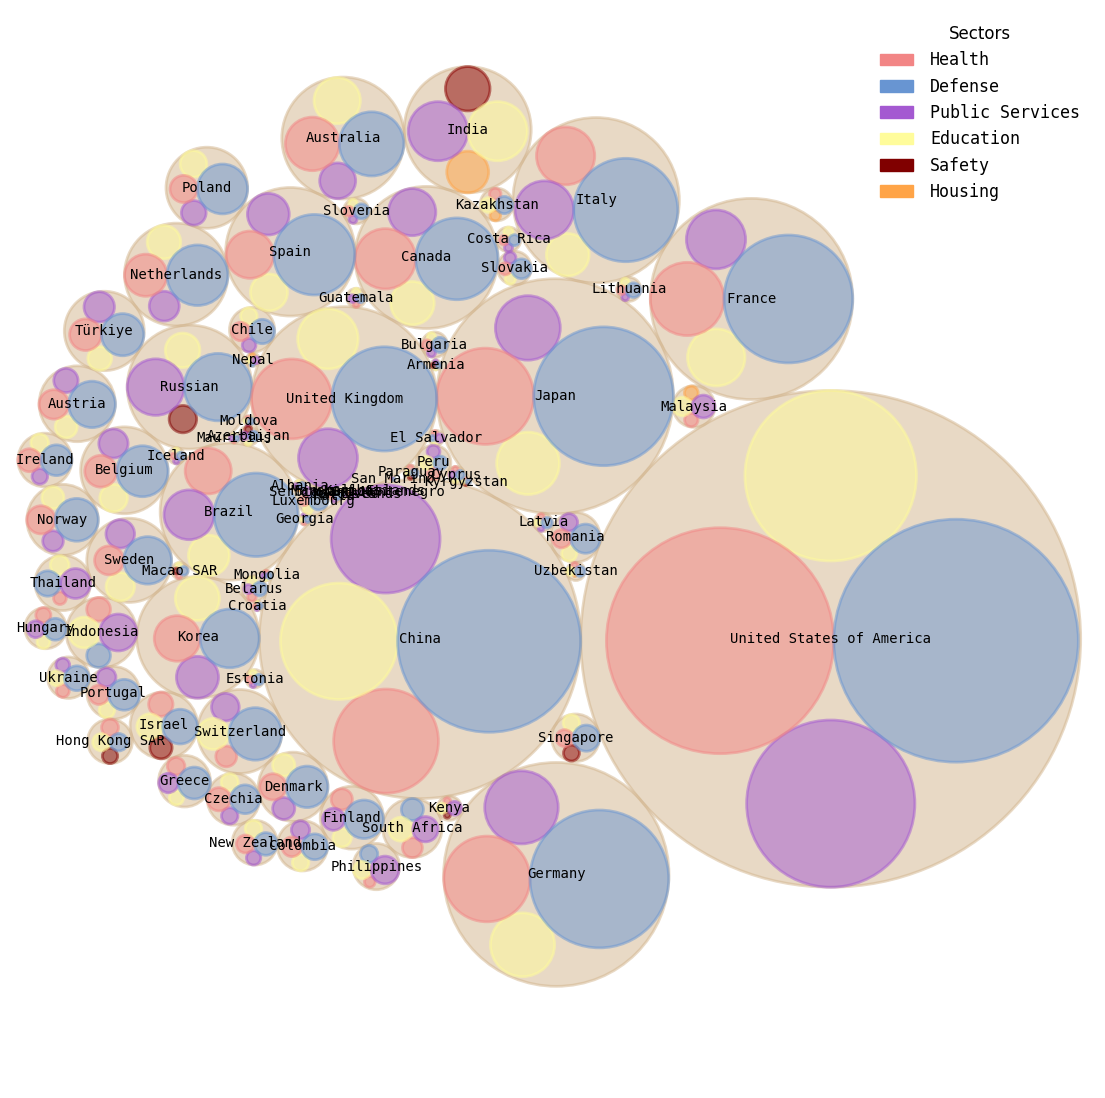

In [23]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(14,14))

# Title
#ax.set_title('Repartition of the world population')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# Print circle the highest level (continents):
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="#D2B48C"))
    
# create a color dict based on
# change color based on label ['Environment protection' 'Housing and community amenities' 'Health' 'Education' 'Social protection' 'General public services' 'Defence' 'Public order and safety']
color_dict = {
    'Environment protection': '#B7E5B4', 
    'Housing and community amenities': '#FFA447',  
    'Health': '#F28585', 
    'Education': '#FFFC9B',  
    'Social protection': '#6895D2',  # Crimson
    'General public services': '#A459D1',  # Fire Brick
    'Defence': '#8B0000',  # Dark Red
    'Public order and safety': '#800000'  # Maroon
}

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    color = color_dict[label]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color=color))
    #plt.annotate(label, (x,y ), ha='center', color="white")
 
# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y) ,va='center', ha='center', bbox=dict(facecolor='none', edgecolor='none', boxstyle='round', pad=.5), family=["monospace"])

# Custom Legend w/ mptaches
import matplotlib.patches as mpatches

# Create a legend
purple_patch = mpatches.Patch(color='#A459D1', label='Public Services')
# green_patch = mpatches.Patch(color='#B7E5B4', label='Environment')
orange_patch = mpatches.Patch(color='#FFA447', label='Housing')
red_patch = mpatches.Patch(color='#F28585', label='Health')
yellow_patch = mpatches.Patch(color='#FFFC9B', label='Education')
blue_patch = mpatches.Patch(color='#6895D2', label='Defense')
maroon_patch = mpatches.Patch(color='#800000', label='Safety')
# no outline
plt.legend(handles=[red_patch, blue_patch, purple_patch, yellow_patch, maroon_patch, orange_patch], loc='upper right', frameon=False, title="Sectors",
           prop={'size': 12,'family':'monospace'}, title_fontsize='12', labelspacing=.5, handletextpad=1)
""" 
"""

# save as svg
plt.savefig('world_expenditure.svg', format='svg', bbox_inches='tight')

# 2020 Treemap (Largest Economies & Happiness)
*  Which country spends the most

In [24]:
current_world_df = world_df[world_df['Year'] == 2020]
current_world_df = current_world_df[current_world_df['Sector'] != "Total function"]
current_world_df = current_world_df[current_world_df['Sector'].isin(sectors)]
current_world_df["Country"] = current_world_df["Country"].map(abbreviations)
current_world_df.head(1)


,Year,Country,Sector,Expenditure(million USD),GDP(%)
23318,2020,NaN,Environment protection,48.758,0.32222


In [25]:
current_world_df

,Year,Country,Sector,Expenditure(million USD),GDP(%)
23318,2020,NaN,Environment protection,48.758,0.32222
23319,2020,NaN,Housing and community amenities,475.990,3.14562
23320,2020,NaN,Health,474.830,3.13795
23321,2020,NaN,Education,498.392,3.29366
23322,2020,NaN,Social protection,1636.088,10.81220
...,...,...,...,...,...
24630,2020,NaN,Housing and community amenities,421.780,0.70421
24631,2020,NaN,Health,1931.438,3.22474
24632,2020,NaN,Education,3662.164,6.11438
24633,2020,NaN,Social protection,5391.474,9.00165


In [26]:
current_world_df.to_csv("current_world_df.csv")

In [12]:
fig = px.treemap(current_world_df, path=['Country', 'Sector'], values='Expenditure(million USD)')
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

# 2020 Treemap (Of Different Industries & Spending)
* What is the most spent industry
* Which countries make up those most spent industries

In [13]:
current_world_df = world_df[world_df['Year'] == 2020]
current_world_df = current_world_df[current_world_df['Sector'] != "Total function"]
current_world_df.head(1)


,Year,Country,Sector,Expenditure(million USD),GDP(%)
6001,2020,Australia,"Agriculture, forestry, fishing and hunting",3896.537,0.27216


In [14]:
sector_pivot_df = pd.pivot_table(current_world_df, index='Sector', columns='Country',values='Expenditure(million USD)')
sector_pivot_df["Sector Sum"] = sector_pivot_df.sum(axis=1)
# for country in sector_pivot_df.columns:
#     sector_pivot_df[country] = sector_pivot_df[country] / sector_pivot_df["Sector Sum"]
sector_pivot_df = sector_pivot_df.drop(columns=['Sector Sum'])
sector_pivot_df = sector_pivot_df.loc[sectors]
sector_rows_df = sector_pivot_df.unstack().reset_index()
sector_rows_df["Country"] = sector_rows_df["Country"].map(abbreviations)
sector_pivot_df.head(1)

Country,Australia,Austria,Belgium,Brazil,Canada,China,France,Germany,India,Italy,...,Korea,Netherlands,Non-Major European,Other,Poland,Russian,Spain,Switzerland,United Kingdom,United States of America
Sector,,,,,,,,,,,,,,,,,,,,,
Environment protection,13887.005,1801.734,7594.005,6832.935,12396.053,108872.531,27381.867,26392.725,562.27,18582.388,...,18295.285,13521.318,14426.674,33675.182,3364.095,3731.896,12589.286,4481.062,19519.241,0.0


In [15]:
fig = px.treemap(sector_rows_df, path=['Sector','Country'], values=0)
# make margins larger and save to svg
fig.update_layout(margin=dict(l=50, r=50, t=75, b=75))

fig.show()

# 2020 Treemap (Of Different Industries & Spending)
* Which country spents more in a specific industry

In [16]:
current_world_df = world_df[world_df['Year'] == 2020]
current_world_df = current_world_df[current_world_df['Sector'] != "Total function"]
current_world_df.head(1)


,Year,Country,Sector,Expenditure(million USD),GDP(%)
6001,2020,Australia,"Agriculture, forestry, fishing and hunting",3896.537,0.27216


In [17]:
sector_pivot_df = pd.pivot_table(current_world_df, index='Sector', columns='Country',values='Expenditure(million USD)')
sector_pivot_df["Sector Sum"] = sector_pivot_df.sum(axis=1)
for country in sector_pivot_df.columns:
    sector_pivot_df[country] = sector_pivot_df[country] / sector_pivot_df["Sector Sum"]
sector_pivot_df = sector_pivot_df.drop(columns=['Sector Sum'])
sector_pivot_df = sector_pivot_df.loc[sectors]
sector_rows_df = sector_pivot_df.unstack().reset_index()
sector_rows_df["Country"] = sector_rows_df["Country"].map(abbreviations)
sector_pivot_df.head(1)

Country,Australia,Austria,Belgium,Brazil,Canada,China,France,Germany,India,Italy,...,Korea,Netherlands,Non-Major European,Other,Poland,Russian,Spain,Switzerland,United Kingdom,United States of America
Sector,,,,,,,,,,,,,,,,,,,,,
Environment protection,0.033726,0.004376,0.018443,0.016594,0.030105,0.264407,0.066499,0.064097,0.001366,0.045129,...,0.044432,0.032838,0.035036,0.081783,0.00817,0.009063,0.030574,0.010883,0.047404,0.0


In [18]:
fig = px.treemap(sector_rows_df, path=['Sector','Country'], values=0)

fig.update_layout(margin=dict(l=50, r=50, t=35, b=10))
fig.update_layout(title="% Expenditure by Sector and Country in 2020", title_font_size=15)

fig.show()

# Time Ridge Plot (% Percent Change in Spending)
* How did percent gdp spent change in all countries

C:\Users\commo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



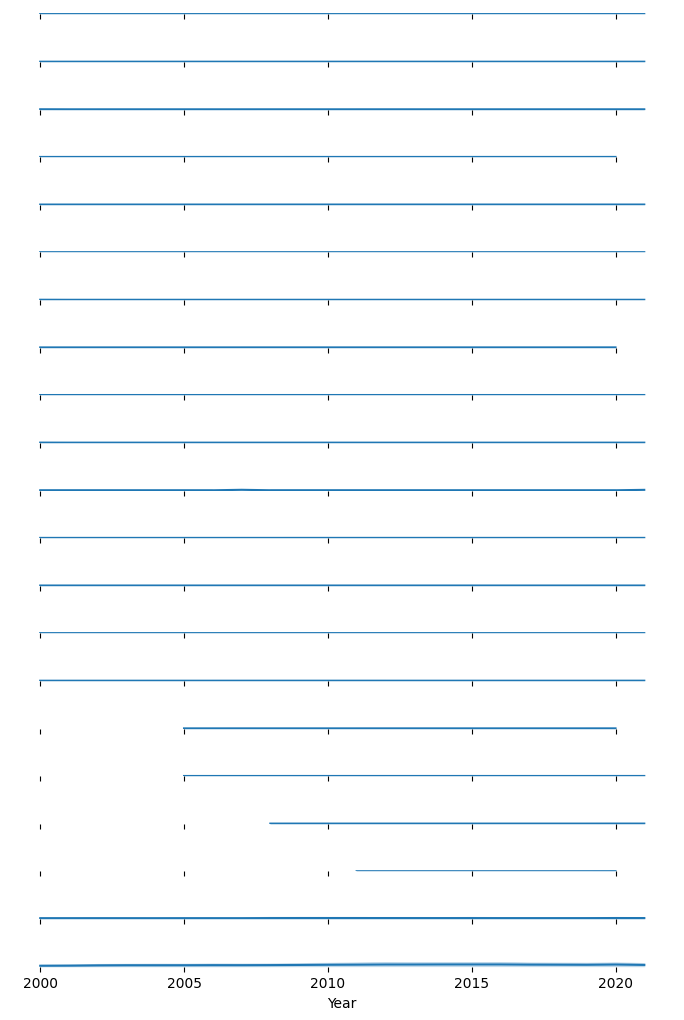

In [24]:
world_totals_df = world_df[world_df['Sector'] == "Total function"]
world_totals_df = world_totals_df[world_totals_df['Country'] == "Australia"]
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(world_df, row="Country", aspect=15, height=.5, palette=pal)

g.map(sns.lineplot, "Year","GDP(%)")

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Time Multiple Country Line Plots (% Percent Change in Spending)
* How did percent gdp spent change in all countries

In [31]:
world_df[world_df["Country"] == "Australia"]

,Year,Country,Sector,Expenditure(million USD),GDP(%)
0,2000,Australia,Total function,153122.633,37.36193
1,2000,Australia,"Agriculture, forestry, fishing and hunting",2195.583,0.53572
2,2000,Australia,"Mining, manufacturing and construction",905.018,0.22082
3,2000,Australia,Transport,11417.379,2.78584
4,2000,Australia,Fuel and energy,2251.241,0.54930
...,...,...,...,...,...
6340,2021,Australia,"Recreation, culture and religion",15996.553,0.92224
6341,2021,Australia,"General economic, commercial and labour affairs",20410.535,1.17672
6342,2021,Australia,Other industries,1634.586,0.09424
6343,2021,Australia,RandD Economic affairs,509.306,0.02936


In [34]:
len(world_df["Country"].unique())

21

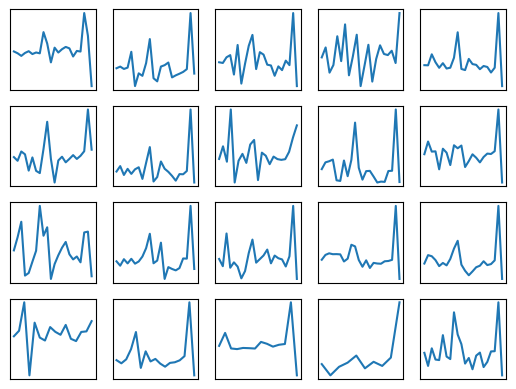

In [50]:
fig,ax = plt.subplots(4,5)

row = 0
col = 0
for i,country in enumerate(world_df["Country"].unique()):
    country_df = world_df[world_df["Country"] == country]
    country_df = country_df[country_df["Sector"] == "Total function"]
    country_df["% Change"] = country_df["GDP(%)"] - country_df["GDP(%)"].shift(1)
    country_df["% Change"] = country_df["% Change"].fillna(0)
    try: 
        sns.lineplot(data=country_df, x="Year", y="% Change", ax=ax[row][col])
        ax[row][col].set_yticks([])
        ax[row][col].set_ylabel("")
        ax[row][col].set_xlabel("")
        ax[row][col].set_xticks([])
    except:
        continue
        
    col += 1
    if col == 5:
        col = 0
        row += 1

# Time Multiple Country + Sector Stacked Plots (% Spent relative to GDP)
* How did sector spending change in all countries relative to GDP

# Time Stacked Plot (% Spent Sector relative  to within-sector Spending)
* How did global sector spending change throughout all the countries

# Time Multiple Sector Stacked Plot (% Spent Country + Sector relative to sector Spending)
* How did sector spending change for the each sector by country